<a href="https://colab.research.google.com/github/Rukawuba/4GeeksAcademy/blob/master/FebruaryWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nba_api



In [2]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

# Fetch all players
all_players = players.get_players()




In [3]:
import pandas as pd
merged_df = pd.read_csv('/content/merged_df.csv')

In [4]:
merged_df.columns


Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Player Name', 'HOF'],
      dtype='object')

In [5]:
import pandas as pd

# Assuming df is your DataFrame
# Example data (replace with your actual DataFrame)


# Count the number of entries (rows) for each player
season_counts = merged_df.groupby('PLAYER_ID').size()

# Convert the series to a DataFrame and reset the index
season_counts_df = season_counts.reset_index(name='TotalSeasons')

# Merge this count back into the original DataFrame
df = merged_df.merge(season_counts_df, on='PLAYER_ID')

df
df.to_csv('seasons_df.csv', index=False)




In [6]:
df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,Player Name,HOF,TotalSeasons
0,76001,1990-91,0,1610612757,POR,23.0,43,0.0,290.0,55,...,89.0,12.0,4.0,12.0,22.0,39.0,135.0,Alaa Abdelnaby,0.0,9
1,76001,1991-92,0,1610612757,POR,24.0,71,1.0,934.0,178,...,260.0,30.0,25.0,16.0,66.0,132.0,432.0,Alaa Abdelnaby,0.0,9
2,76001,1992-93,0,1610612749,MIL,25.0,12,0.0,159.0,26,...,37.0,10.0,6.0,4.0,13.0,24.0,64.0,Alaa Abdelnaby,0.0,9
3,76001,1992-93,0,1610612738,BOS,25.0,63,52.0,1152.0,219,...,300.0,17.0,19.0,22.0,84.0,165.0,514.0,Alaa Abdelnaby,0.0,9
4,76001,1992-93,0,0,TOT,25.0,75,52.0,1311.0,245,...,337.0,27.0,25.0,26.0,97.0,189.0,578.0,Alaa Abdelnaby,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,1619,1999-00,0,1610612753,ORL,25.0,3,0.0,23.0,2,...,1.0,2.0,0.0,0.0,1.0,0.0,4.0,Kiwane Garris,0.0,2
7261,1727,1998-99,0,1610612756,PHX,22.0,39,9.0,538.0,85,...,75.0,18.0,8.0,3.0,20.0,62.0,217.0,Pat Garrity,0.0,4
7262,1727,1999-00,0,1610612753,ORL,23.0,82,1.0,1479.0,258,...,210.0,58.0,31.0,19.0,85.0,197.0,675.0,Pat Garrity,0.0,4
7263,1727,2000-01,0,1610612753,ORL,24.0,76,1.0,1579.0,223,...,210.0,51.0,40.0,15.0,68.0,241.0,628.0,Pat Garrity,0.0,4


In [7]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Example data (use your actual DataFrame instead)



# Specify the columns you want to sum
columns_to_sum = ['GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS']  # Update this list with your actual column names



# Group by PLAYER_ID and aggregate
aggregated_stats = df.groupby('PLAYER_ID').agg({
    'PLAYER_ID':'first',
    'Player Name': 'first',  # Keep the full name of each player
    'HOF': 'first',          # Keep the HOF status for each player
    **{col: 'sum' for col in columns_to_sum},  # Sum the specified columns
    'TotalSeasons': 'size',  # Count the number of entries for each player
})

aggregated_stats.head(25)

#aggregated_stats.to_csv('NBA_full_data.csv', index = False)


,PLAYER_ID,Player Name,HOF,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
17,17,Clyde Drexler,1.0,1162,1025.0,40266.0,8906,18911,7.924,974.0,...,2767.0,4390.0,7157.0,6487.0,2343.0,764.0,3163.0,3491.0,23848.0,17
21,21,Greg Anthony,0.0,817,265.0,17364.0,2097,5225,5.208,658.0,...,293.0,1256.0,1549.0,3279.0,964.0,84.0,1137.0,1438.0,5971.0,13
30,30,Richard Dumas,0.0,102,47.0,2226.0,434,852,1.499,3.0,...,160.0,191.0,351.0,111.0,137.0,47.0,150.0,228.0,1080.0,3
41,41,Anthony Bonner,0.0,318,120.0,7372.0,881,1881,2.708,2.0,...,708.0,1018.0,1726.0,442.0,346.0,84.0,450.0,784.0,2199.0,6
51,51,Mahmoud Abdul-Rauf,0.0,586,336.0,15627.0,3514,7943,3.958,474.0,...,219.0,868.0,1087.0,2079.0,487.0,46.0,963.0,1106.0,8553.0,9
53,53,Mario Elie,0.0,765,395.0,19301.0,2202,4651,5.988,578.0,...,566.0,1561.0,2127.0,1920.0,690.0,139.0,990.0,1523.0,6502.0,13
55,55,Marty Conlon,0.0,409,38.0,6894.0,1062,2107,5.303,15.0,...,551.0,898.0,1449.0,412.0,157.0,81.0,446.0,753.0,2687.0,11
57,57,Doug Christie,0.0,934,769.0,28637.0,3518,8273,7.687,866.0,...,869.0,2844.0,3713.0,3308.0,1705.0,429.0,1920.0,2298.0,10061.0,19
66,66,Marques Bragg,0.0,53,0.0,369.0,54,120,0.450,0.0,...,38.0,41.0,79.0,8.0,17.0,8.0,26.0,71.0,131.0,1


In [8]:
aggregated_stats.columns


Index(['PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'],
      dtype='object')

In [9]:
aggregated_stats.to_csv('NBA_full_data.csv', index = False)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
                    'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
                    'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons']
df_selected = df[selected_columns]


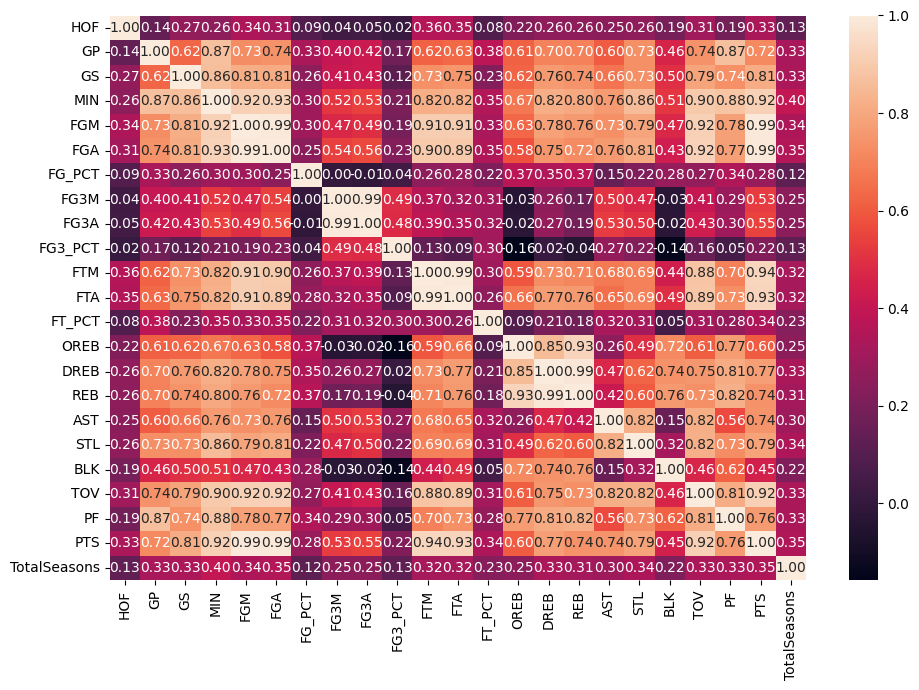

In [11]:
# Setting up the matplotlib figure
fig, axis = plt.subplots(figsize=(10, 7))

# Draw the heatmap
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f")

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
aggregated_stats.describe()

,PLAYER_ID,HOF,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,TotalSeasons
count,1.071000e+03,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,4.427752e+05,0.016807,323.772176,150.019608,7466.010271,1191.540616,2589.056022,2.950848,188.272642,532.638655,...,367.457516,929.675070,1297.060691,709.059757,246.726424,154.564893,448.035481,675.833800,3152.784314,6.783380
std,6.627904e+05,0.128607,345.422792,246.258740,9831.748130,1795.078367,3833.207767,2.586573,391.622358,1054.751630,...,596.554805,1414.421186,1976.207211,1202.400874,358.650671,327.891792,639.516282,833.680073,4812.496047,5.643269
min,1.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.219000e+03,0.000000,37.500000,0.000000,327.500000,38.000000,94.000000,0.734000,0.000000,5.000000,...,14.000000,36.000000,54.500000,22.000000,10.000000,4.000000,20.500000,38.500000,99.000000,2.000000
50%,7.659800e+04,0.000000,187.000000,25.000000,2614.000000,373.000000,808.000000,2.078000,11.000000,49.000000,...,118.000000,295.000000,440.000000,172.000000,78.000000,34.000000,145.000000,285.000000,958.000000,5.000000
75%,2.039525e+05,0.000000,541.500000,192.500000,11580.000000,1673.000000,3568.000000,4.809500,166.000000,500.000000,...,463.500000,1298.000000,1753.000000,811.500000,350.000000,151.500000,624.500000,1111.000000,4267.000000,11.000000
max,1.641931e+06,1.000000,1691.000000,1472.000000,51366.000000,11719.000000,26200.000000,12.697000,3557.000000,8350.000000,...,4260.000000,11716.000000,15091.000000,7057.000000,2343.000000,3064.000000,4010.000000,4431.000000,33643.000000,26.000000


In [35]:
import pandas as pd

# Assuming 'df' is your DataFrame with player names and IDs
player_mapping_df = aggregated_stats[['Player Name', 'PLAYER_ID']].drop_duplicates()

# If you want to reset the index of the new DataFrame
player_mapping_df = player_mapping_df.reset_index(drop=True)


In [36]:
# Assuming 'Player Name' and 'Player ID' are columns in your DataFrame
name_to_id_mapping = aggregated_stats.set_index('Player Name')['PLAYER_ID'].to_dict()
import pickle

with open('name_to_id_mapping.pkl', 'wb') as file:
    pickle.dump(name_to_id_mapping, file)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
num_variables = ["GP", "GS", "MIN", "FGM", "FG_PCT", "FG3M",
        "FTM", "REB", "AST","STL", "BLK", "PTS", "TotalSeasons"]

# We divide the dataset into training and test samples
X = aggregated_stats.drop("HOF", axis = 1)[num_variables]
y = aggregated_stats["HOF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,GP,GS,MIN,FGM,FG_PCT,FG3M,FTM,REB,AST,STL,BLK,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,
1630536,13,0.0,39.0,3,0.214,1.0,0,5.0,5.0,0.0,0.0,7.0,1
201963,58,18.0,1152.0,142,1.323,27.0,26,151.0,45.0,40.0,38.0,337.0,4
2037,1392,498.0,41472.0,7171,9.132,2363.0,3994,3141.0,4829.0,1236.0,284.0,20699.0,22
1629541,12,0.0,167.0,12,0.255,10.0,0,9.0,10.0,1.0,0.0,34.0,1
203920,349,97.0,6354.0,726,4.235,27.0,405,1628.0,363.0,184.0,204.0,1884.0,8


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,GP,GS,MIN,FGM,FG_PCT,FG3M,FTM,REB,AST,STL,BLK,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,
1630536,-0.894188,-0.614042,-0.753601,-0.665043,-1.055088,-0.489530,-0.585137,-0.652482,-0.586672,-0.688643,-0.456107,-0.659674,-1.018767
201963,-0.761004,-0.538939,-0.637714,-0.584735,-0.614798,-0.418377,-0.558181,-0.576177,-0.552182,-0.573790,-0.344346,-0.588169,-0.475312
2037,3.187155,1.463787,3.560471,3.476268,2.485498,5.974464,3.555758,0.986491,3.572825,2.860304,0.379165,3.823951,2.785420
1629541,-0.897148,-0.614042,-0.740274,-0.659843,-1.038811,-0.464900,-0.585137,-0.650391,-0.582361,-0.685772,-0.456107,-0.653824,-1.018767
203920,0.100251,-0.209324,-0.096073,-0.247330,0.541312,-0.418377,-0.165242,0.195749,-0.277986,-0.160321,0.143877,-0.252959,0.249295


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,GP,GS,MIN,FGM,FG_PCT,FG3M,FTM,REB,AST,STL,BLK,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,
1630536,0.008627,0.000000,0.000792,0.000292,0.020373,0.000315,0.000000,0.000331,0.000709,0.000000,0.000000,0.000240,0.000000
201963,0.040978,0.012959,0.023400,0.013807,0.125952,0.008507,0.003634,0.010006,0.006377,0.017072,0.012402,0.011536,0.130435
2037,1.000000,0.358531,0.842413,0.697229,0.869383,0.744486,0.558211,0.208137,0.684285,0.527529,0.092689,0.708554,0.913043
1629541,0.007908,0.000000,0.003392,0.001167,0.024276,0.003151,0.000000,0.000596,0.001417,0.000427,0.000000,0.001164,0.000000
203920,0.250180,0.069834,0.129068,0.070588,0.403180,0.008507,0.056604,0.107879,0.051438,0.078532,0.066580,0.064492,0.304348


In [40]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,GS,MIN,FGM,FTM,STL,PTS
0,0.0,39.0,3.0,0.0,0.0,7.0
1,18.0,1152.0,142.0,26.0,40.0,337.0
2,498.0,41472.0,7171.0,3994.0,1236.0,20699.0
3,0.0,167.0,12.0,0.0,1.0,34.0
4,97.0,6354.0,726.0,405.0,184.0,1884.0


In [41]:
X_train_sel["HOF"] = list(y_train)
X_test_sel["HOF"] = list(y_test)
X_train_sel.to_csv("clean_train.csv", index=False)
X_test_sel.to_csv("clean_test.csv", index=False)

In [42]:
X_train_sel.head()

,GS,MIN,FGM,FTM,STL,PTS,HOF
0,0.0,39.0,3.0,0.0,0.0,7.0,0.0
1,18.0,1152.0,142.0,26.0,40.0,337.0,0.0
2,498.0,41472.0,7171.0,3994.0,1236.0,20699.0,0.0
3,0.0,167.0,12.0,0.0,1.0,34.0,0.0
4,97.0,6354.0,726.0,405.0,184.0,1884.0,0.0


In [51]:
aggregated_stats.columns

'PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'


Index(['PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'],
      dtype='object')

In [53]:
X_train.columns



Need to remove 'PLAYER_ID', 'Player Name', 'GP', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST','BLK', 'TOV', 'PF', 'TotalSeasons'

'GS', 'MIN', 'FGM', 'FTM', 'STL', 'PTS'

Index(['GS', 'MIN', 'FGM', 'FTM', 'STL', 'PTS'], dtype='object')

So here is my simplified based model for Logistic Regression

In [59]:
import pickle
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train = X_train_sel.drop(["HOF"], axis = 1)
y_train = X_train_sel["HOF"]
X_test = X_test_sel.drop(["HOF"], axis = 1)
y_test = X_test_sel["HOF"]


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy


# Save the trained model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.linear_model import LogisticRegression


X_train = X_train_sel.drop(["HOF"], axis = 1)
y_train = X_train_sel["HOF"]
X_test = X_test_sel.drop(["HOF"], axis = 1)
y_test = X_test_sel["HOF"]




model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.986046511627907

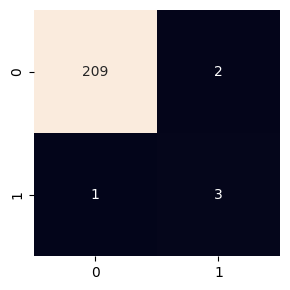

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

hof_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(hof_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

The first iteration of the model is complete.. Now we can start the optimization.. But Notice the results.. This is heavily due to the fact that we have imbalanced data.. We will certainly need to correct this. Alos we can adjust threshold.. and some other things

Now we will Try with the first example given to us from Chat GPT which is RandomOverSampler

In [47]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have imported your data and split it into X_train_sel, y_train_sel, X_test_sel, y_test_sel

X_train = X_train_sel.drop(["HOF"], axis = 1)
y_train = X_train_sel["HOF"]
X_test = X_test_sel.drop(["HOF"], axis = 1)
y_test = X_test_sel["HOF"]

# Apply resampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train the logistic regression model on the balanced dataset
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the original test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       211
         1.0       0.17      1.00      0.30         4

    accuracy                           0.91       215
   macro avg       0.59      0.95      0.62       215
weighted avg       0.98      0.91      0.94       215



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now trying it while decrease the threshold to see how that changes things....

In [48]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [49]:
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have imported your data and split it into X_train_sel, y_train_sel, X_test_sel, y_test_sel

X_train = X_train_sel.drop(["HOF"], axis = 1)
y_train = X_train_sel["HOF"]
X_test = X_test_sel.drop(["HOF"], axis = 1)
y_test = X_test_sel["HOF"]

# Apply resampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train the logistic regression model on the balanced dataset
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Get probabilities for positive class (class 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Set your desired threshold (e.g., 0.4)
threshold = 0.2

# Adjust predictions based on the threshold
y_pred_adjusted = (y_proba > threshold).astype(int)

# Print classification report with adjusted predictions
print(classification_report(y_test, y_pred_adjusted))


# Save the model and adjusted predictions as a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump((model, y_pred_adjusted), file)



              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69       211
         1.0       0.04      1.00      0.07         4

    accuracy                           0.54       215
   macro avg       0.52      0.77      0.38       215
weighted avg       0.98      0.54      0.68       215



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
X_train

,GS,MIN,FGM,FTM,AST,STL,PTS
0,0.0,39.0,3.0,0.0,5.0,0.0,7.0
1,18.0,1152.0,142.0,26.0,45.0,40.0,337.0
2,498.0,41472.0,7171.0,3994.0,4829.0,1236.0,20699.0
3,0.0,167.0,12.0,0.0,10.0,1.0,34.0
4,97.0,6354.0,726.0,405.0,363.0,184.0,1884.0
...,...,...,...,...,...,...,...
851,94.0,8270.0,1102.0,634.0,342.0,245.0,3196.0
852,1.0,522.0,88.0,65.0,11.0,13.0,242.0
853,420.0,23620.0,2923.0,1481.0,3807.0,846.0,7674.0
854,0.0,199.0,17.0,2.0,16.0,8.0,40.0
